Time step: 1


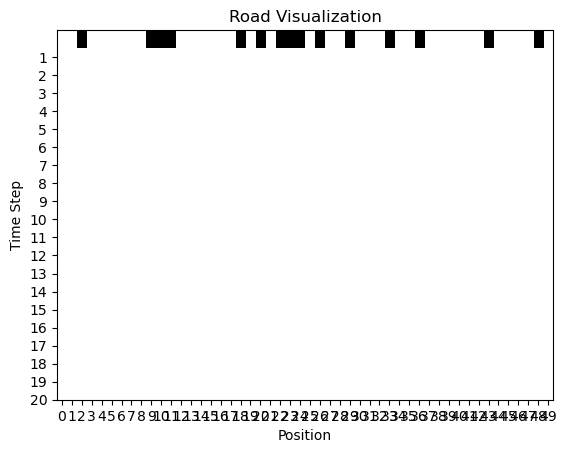


Time step: 2


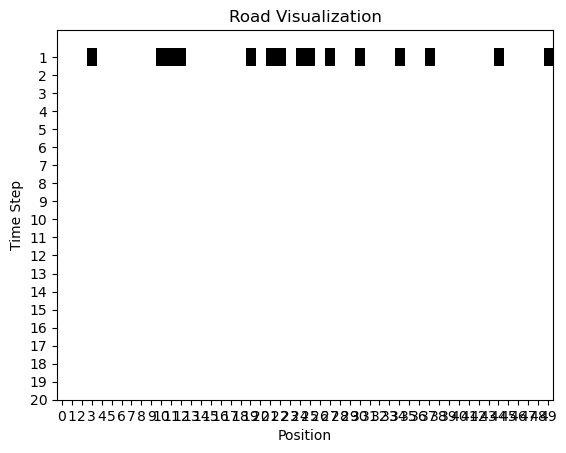


Time step: 3


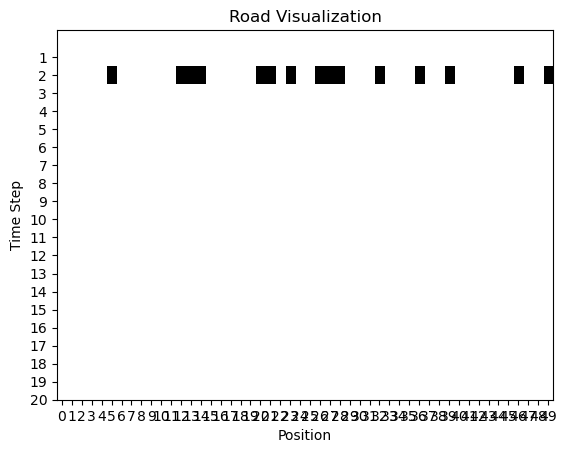


Time step: 4


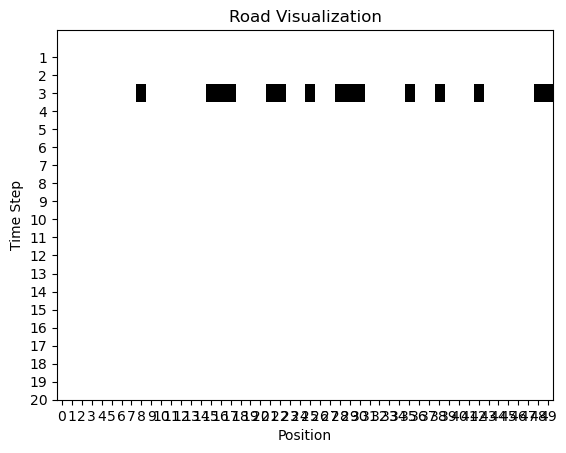


Time step: 5


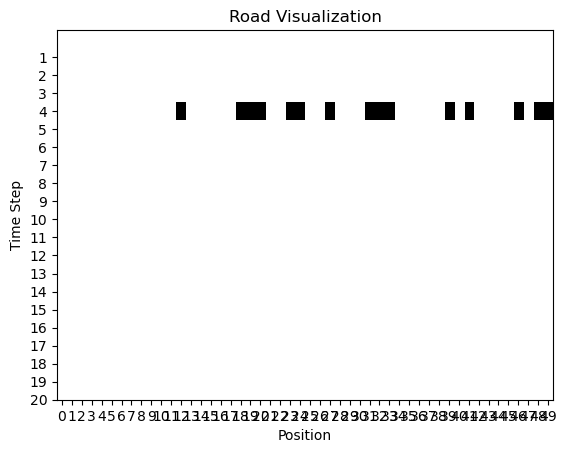


Time step: 6


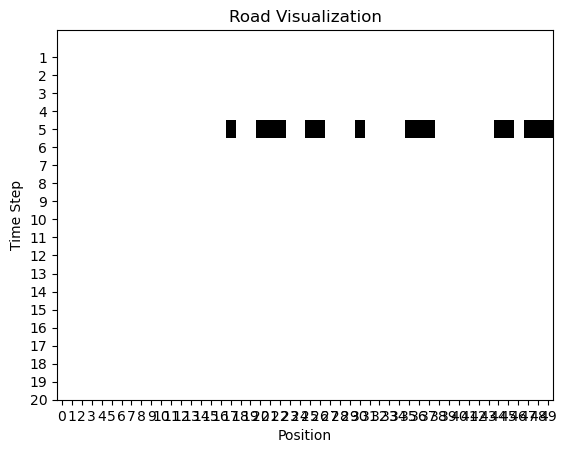


Time step: 7


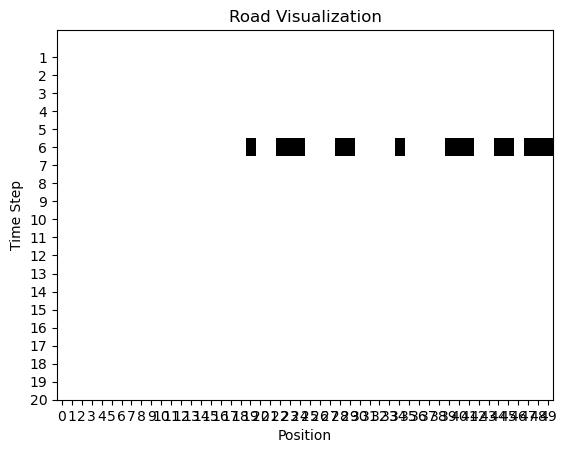


Time step: 8


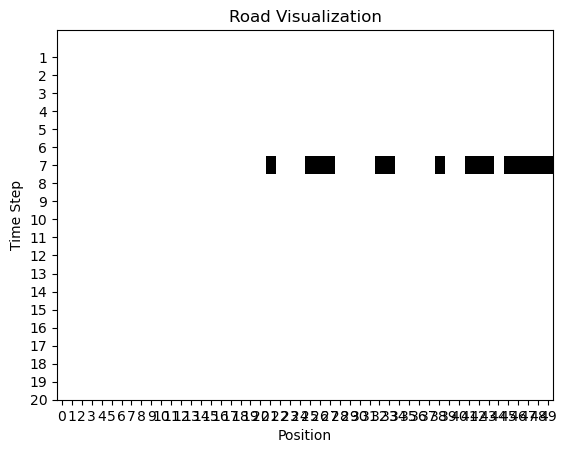


Time step: 9


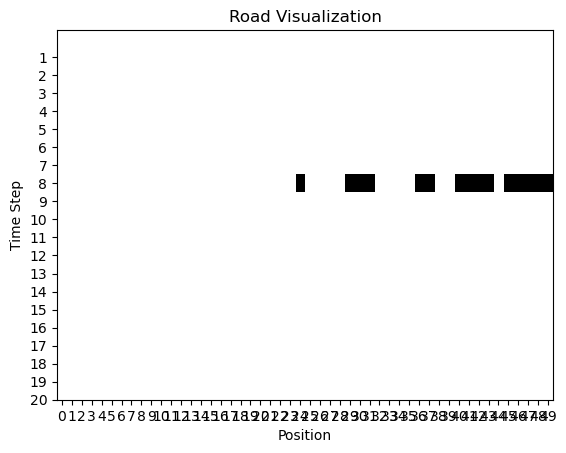


Time step: 10


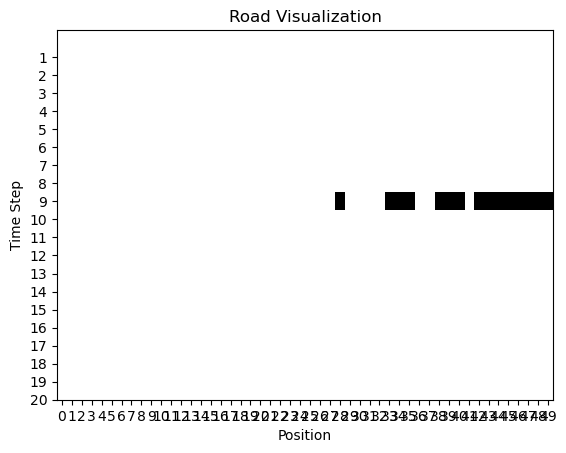


Time step: 11


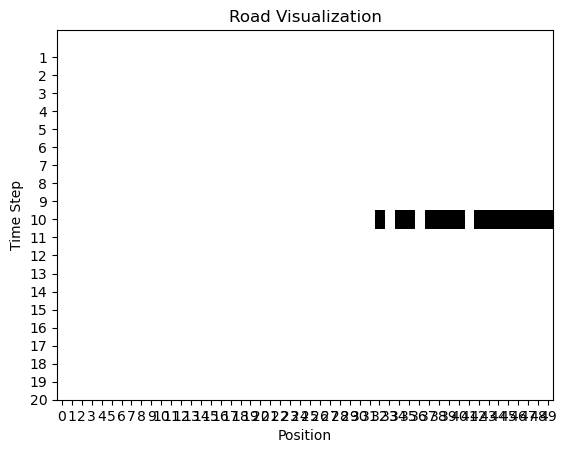


Time step: 12


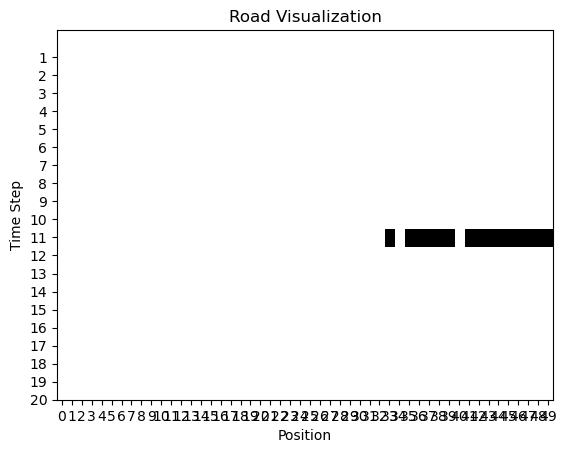


Time step: 13


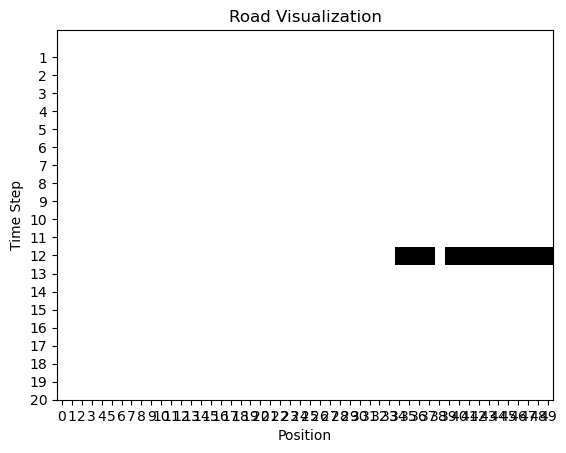


Time step: 14


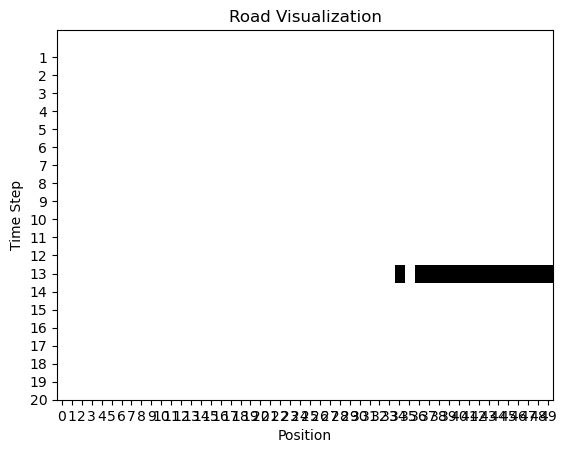


Time step: 15


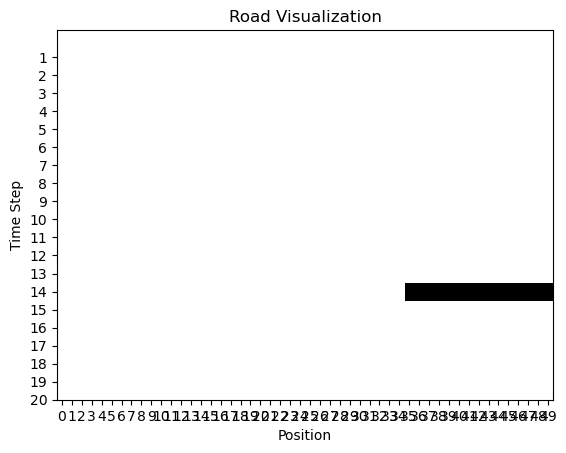


Time step: 16


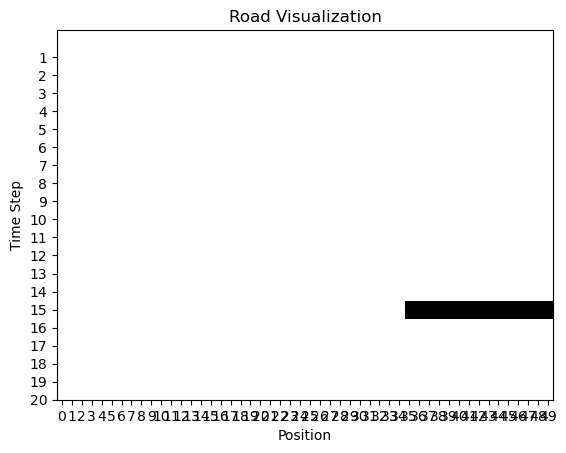


Time step: 17


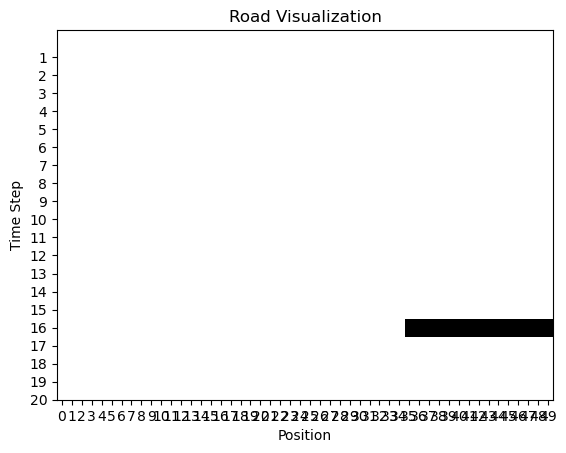


Time step: 18


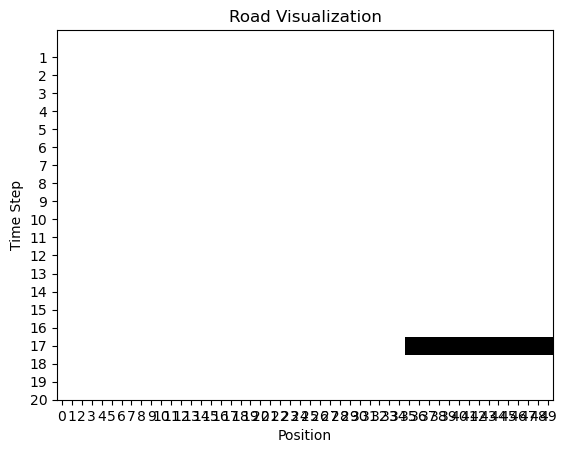


Time step: 19


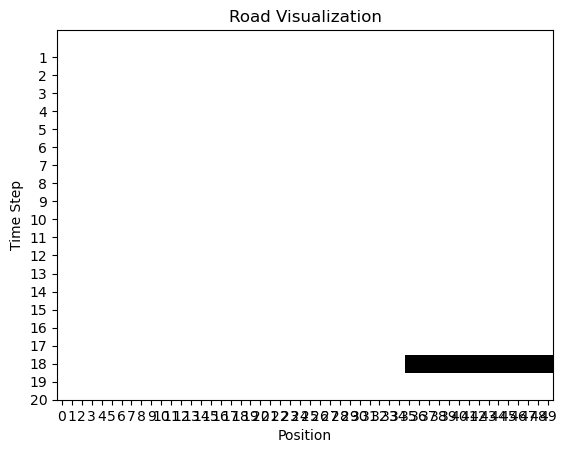


Time step: 20


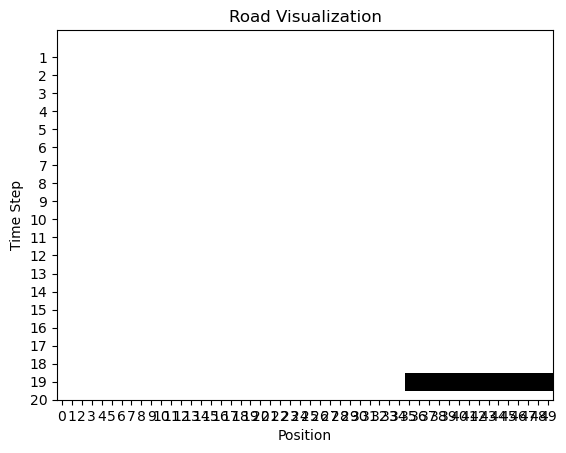

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, density, max_velocity, randomization):
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.vehicles = []

    def setup(self):
        num_vehicles = int(self.density * self.length)
        vehicle_positions = np.random.choice(range(self.length), num_vehicles, replace=False)
        for position in vehicle_positions:
            self.vehicles.append(Vehicle(position, self.max_velocity))

    def update(self):
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            vehicle.position = (vehicle.position + vehicle.velocity) % self.length

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self, timestep):
        road_state = np.zeros((20, self.length))
        for vehicle in self.vehicles:
            road_state[timestep, vehicle.position] = 1
        plt.imshow(road_state, cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks(range(1, 21))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 50
density = 0.3
max_velocity = 5
randomization = 0.1
road = Road(length, density, max_velocity, randomization)
road.setup()

for i in range(20):
    print("Time step:", i+1)
    road.visualize(i)
    road.update()
    print()


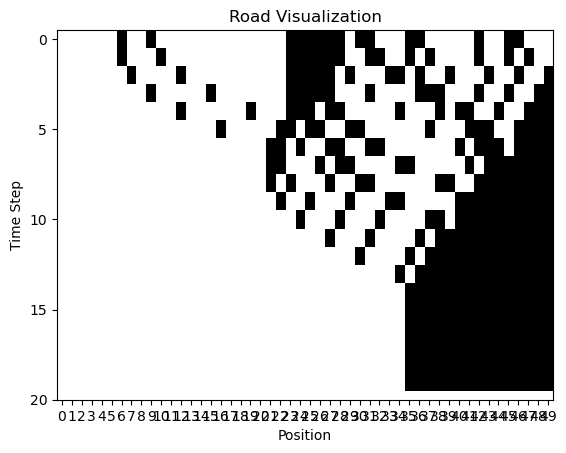

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, density, max_velocity, randomization):
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.vehicles = []

    def setup(self):
        num_vehicles = int(self.density * self.length)
        vehicle_positions = np.random.choice(range(self.length), num_vehicles, replace=False)
        for position in vehicle_positions:
            self.vehicles.append(Vehicle(position, self.max_velocity))

    def update(self):
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            vehicle.position = (vehicle.position + vehicle.velocity) % self.length

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros((20, self.length))
        for timestep in range(20):
            for vehicle in self.vehicles:
                road_state[timestep, vehicle.position] = 1
            self.update()
        plt.imshow(road_state, cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks(range(0, 21, 5))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 50
density = 0.3
max_velocity = 5
randomization = 0.1
road = Road(length, density, max_velocity, randomization)
road.setup()
road.visualize()


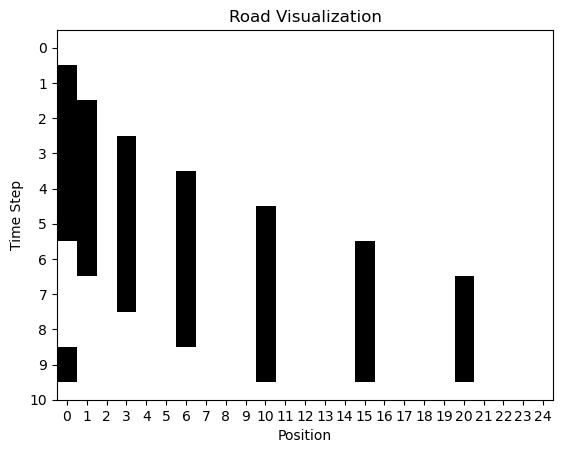

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, max_velocity, randomization, production_probability):
        self.length = length
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.production_probability = production_probability
        self.vehicles = []

    def setup(self):
        if np.random.rand() < self.production_probability:
            self.vehicles.append(Vehicle(0, self.max_velocity))

    def update(self):
        new_vehicles = []
        for vehicle in self.vehicles:
            vehicle.accelerate()
            vehicle.position += vehicle.velocity
            if vehicle.position < self.length:  # Only add vehicles that haven't reached the end
                new_vehicles.append(vehicle)
        self.vehicles = new_vehicles

    def visualize(self):
        road_state = np.zeros((10, self.length))
        for timestep in range(10):
            for vehicle in self.vehicles:
                if vehicle.position < self.length:
                    road_state[timestep, vehicle.position] = 1
            self.update()
            self.setup()  # Introduce new vehicles with probability
        plt.imshow(road_state, cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks(range(0, 11, 1))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 25
max_velocity = 5
randomization = 0.1
production_probability = 0.8
road = Road(length, max_velocity, randomization, production_probability)
road.visualize()


In [8]:
#Another sample
import numpy as np
import matplotlib.pyplot as plt

class Car:
    def __init__(self, position, speed, max_speed, length, width, randomization):
        self.position = position
        self.speed = speed
        self.max_speed = max_speed
        self.length = length
        self.width = width
        self.randomization = randomization
        self.headway_distance = None  # Initialize headway distance as None

    def calculate_headway_distance(self, cars):
        # Calculate headway distance based on positions of other cars
        next_car_position = min((v.position for v in cars if v.position > self.position), default=np.inf)
        self.headway_distance = next_car_position - self.position - 1 if next_car_position != np.inf else np.inf

    def accelerate(self):
        if self.speed < self.max_speed:
            self.speed += 1

    def decelerate(self):
        if self.speed > self.headway_distance:
            self.speed = self.headway_distance  # reduce speed equivalent only to headway distance

    def random_brake(self):
        if np.random.random() < self.randomization and self.speed > 0:
            self.speed -= 1

class Road:
    def __init__(self, length, width, max_speed, production_prob):
        self.length = length  # length of the road
        self.width = width    # width of the road
        self.max_speed = max_speed  # speed limit of the road
        self.production_prob = production_prob
        self.cars = []  # empty array to denote empty road configuration at the start

    def add_car(self, car):
        self.cars.append(car)

    def remove_cars(self):
        self.cars = [car for car in self.cars if car.position != self.length - 1]

    def update(self):
        for car in self.cars:
            car.calculate_headway_distance(self.cars)  # Calculate headway distance for each car
            car.accelerate()
            car.decelerate()
            car.position += car.speed  # Forward Movement
        self.remove_cars()

        # Produce new cars
        if np.random.rand() < self.production_prob:
            length = np.random.choice([1, 2, 5, 9])
            if length == 1:
                car_width = 1
            else:
                car_width = 2
            new_car = Car(0, np.random.randint(1, self.max_speed + 1), self.max_speed, length, car_width, 0.3)
            self.add_car(new_car)
    
    def get_road_state(self):
        road_state = np.zeros((self.length, self.width), dtype=int)  # Generates zeros representing empty road configuration
        for car in self.cars:
            for i in range(car.width):
                road_state[car.position: car.position + car.length, i] = 1  # Assigns value of 1 for occupied positions
        return road_state

    def visualize(self):
        road_states = [self.get_road_state() for _ in range(30)]
        spatio_temporal_plot = np.vstack(road_states)
        
        plt.imshow(spatio_temporal_plot, cmap="binary", aspect="auto")
        plt.title("Spatio-Temporal Road")
        plt.xlabel("Position")
        plt.ylabel("Time")
        plt.show()

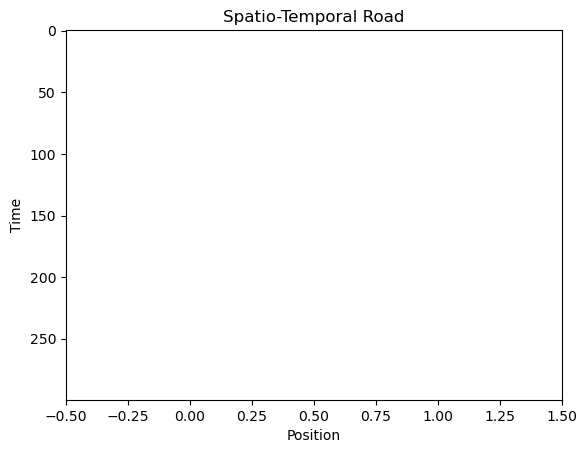

In [9]:
# Create road object
road = Road(length=10, width=2, max_speed=5, production_prob=0.3)

# Simulate the road and generate spatio-temporal plot
road.update()
road.visualize()

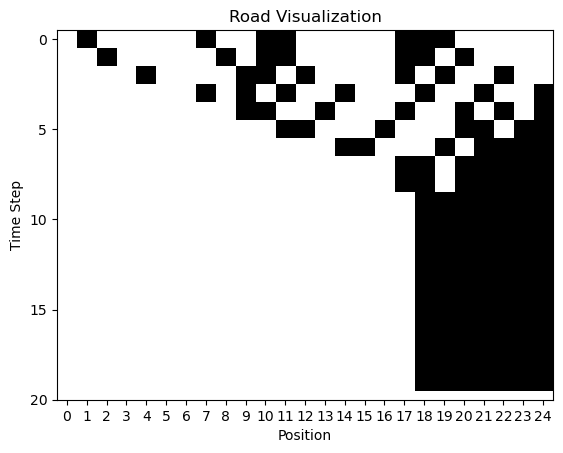

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, max_velocity):
        self.position = position
        self.velocity = 0
        self.max_velocity = max_velocity

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self, distance_to_next):
        if self.velocity > distance_to_next:
            self.velocity = distance_to_next

    def randomize(self, randomization):
        if np.random.rand() < randomization and self.velocity > 0:
            self.velocity -= 1

class Road:
    def __init__(self, length, density, max_velocity, randomization):
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.randomization = randomization
        self.vehicles = []

    def setup(self):
        num_vehicles = int(self.density * self.length)
        vehicle_positions = np.random.choice(range(self.length), num_vehicles, replace=False)
        for position in vehicle_positions:
            self.vehicles.append(Vehicle(position, self.max_velocity))

    def update(self):
        for vehicle in self.vehicles:
            distance_to_next = self.distance_to_next(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(distance_to_next)
            vehicle.randomize(self.randomization)
            vehicle.position = (vehicle.position + vehicle.velocity) % self.length

    def distance_to_next(self, vehicle):
        next_vehicle_position = min((v.position for v in self.vehicles if v.position > vehicle.position), default=self.length)
        return next_vehicle_position - vehicle.position - 1

    def visualize(self):
        road_state = np.zeros((20, self.length))
        for timestep in range(20):
            for vehicle in self.vehicles:
                road_state[timestep, vehicle.position] = 1
            self.update()
        plt.imshow(road_state, cmap='binary', aspect='auto')
        plt.xticks(range(self.length))
        plt.yticks(range(0, 21, 5))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
length = 25
density = 0.3
max_velocity = 5
randomization = 0.1
road = Road(length, density, max_velocity, randomization)
road.setup()
road.visualize()
